# Group 2 Assignment 1

In [23]:
# Import all the libraries, numpy and pandas for processing, and seaborn and matplotlib for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore FutureWarnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [24]:
# Load the dataframe in
df = pd.read_csv('Ass1Data/California_Houses.csv')
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568



## EDA

In [25]:
# First, let's see a summary for all the columns
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [26]:
# And let's check with how many rows and columns we are working with -> 20.640 rows and 14 columns
df.shape

(20640, 14)

In [27]:
# Then, let's check the data summary, check for null-values, and check the data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [28]:
# We can double-check the null-values using
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

As can be seen, there are 20.640 entries of houses, and none of the columns contain null-values. That means that most of the data is quite clean already, as we don't need to process missing values or null values.

In [29]:
# Now, let's check the duplicate values for each column
df.nunique()

Median_House_Value           3842
Median_Income               12928
Median_Age                     52
Tot_Rooms                    5926
Tot_Bedrooms                 1928
Population                   3888
Households                   1815
Latitude                      862
Longitude                     844
Distance_to_coast           12590
Distance_to_LA              12590
Distance_to_SanDiego        12590
Distance_to_SanJose         12590
Distance_to_SanFrancisco    12590
dtype: int64

In [30]:
# Now let's check the correlation matrix for the dataset
corr_all_variables = df.corr()
corr_all_variables.style.format(precision=2).background_gradient(cmap='coolwarm')

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.00,0.69,0.11,0.13,0.05,-0.02,0.07,-0.14,-0.05,-0.47,-0.13,-0.09,-0.04,-0.03
Median_Income,0.69,1.00,-0.12,0.20,-0.01,0.00,0.01,-0.08,-0.02,-0.24,-0.07,-0.06,-0.04,-0.02
Median_Age,0.11,-0.12,1.00,-0.36,-0.32,-0.30,-0.30,0.01,-0.11,-0.23,-0.03,0.04,-0.09,-0.10
Tot_Rooms,0.13,0.20,-0.36,1.00,0.93,0.86,0.92,-0.04,0.04,-0.00,-0.02,-0.04,0.03,0.03
Tot_Bedrooms,0.05,-0.01,-0.32,0.93,1.00,0.88,0.98,-0.07,0.07,-0.02,-0.06,-0.07,0.06,0.06
Population,-0.02,0.00,-0.30,0.86,0.88,1.00,0.91,-0.11,0.10,-0.04,-0.11,-0.11,0.08,0.09
Households,0.07,0.01,-0.30,0.92,0.98,0.91,1.00,-0.07,0.06,-0.06,-0.06,-0.07,0.05,0.05
Latitude,-0.14,-0.08,0.01,-0.04,-0.07,-0.11,-0.07,1.00,-0.92,0.30,0.94,0.99,-0.86,-0.90
Longitude,-0.05,-0.02,-0.11,0.04,0.07,0.10,0.06,-0.92,1.00,0.01,-0.89,-0.96,0.92,0.95
Distance_to_coast,-0.47,-0.24,-0.23,-0.00,-0.02,-0.04,-0.06,0.30,0.01,1.00,0.20,0.21,-0.08,-0.07


Since our target variable is 'median_house_value', and our interest is in whether the proximity to an urban center has influence on it, we'll focus further now on the variables: 'Median_House_Value' and 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco'

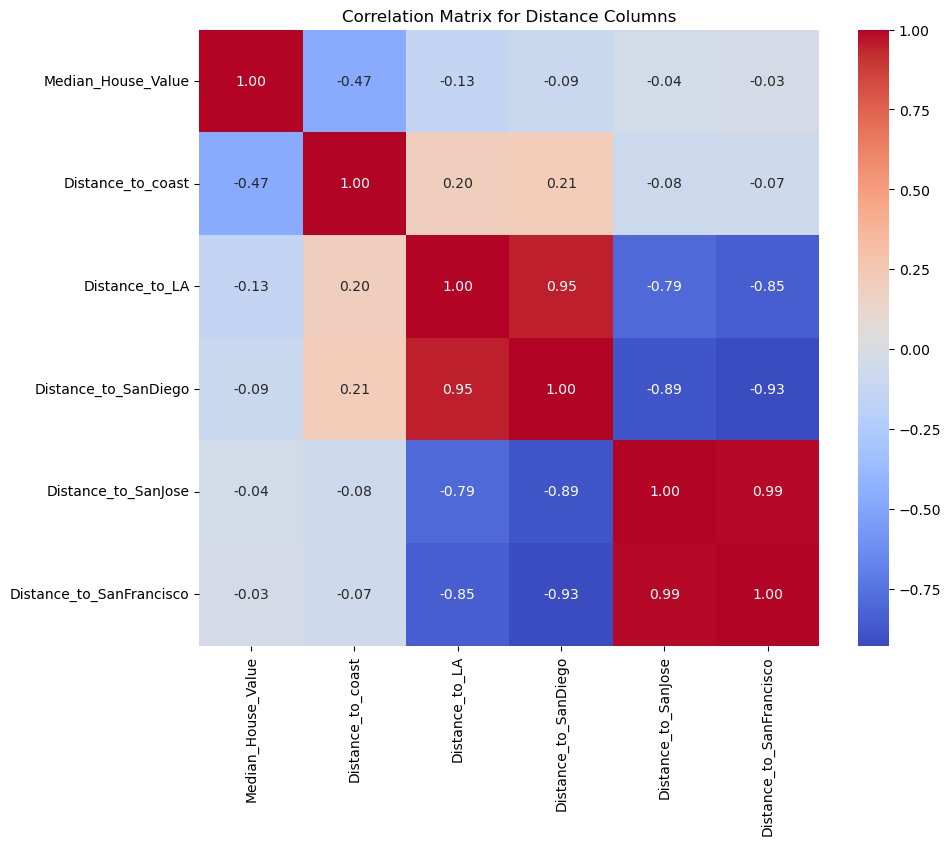

In [31]:
# Let's see the correlation matrix for only the distance columns again
distance_columns = df[['Median_House_Value', 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']]
corr_distances = distance_columns.corr()

# Plot the heatmap and save it as an image
plt.figure(figsize=(10, 8))
sns.heatmap(corr_distances, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Distance Columns')
plt.savefig('corr_distances.png')
plt.show()


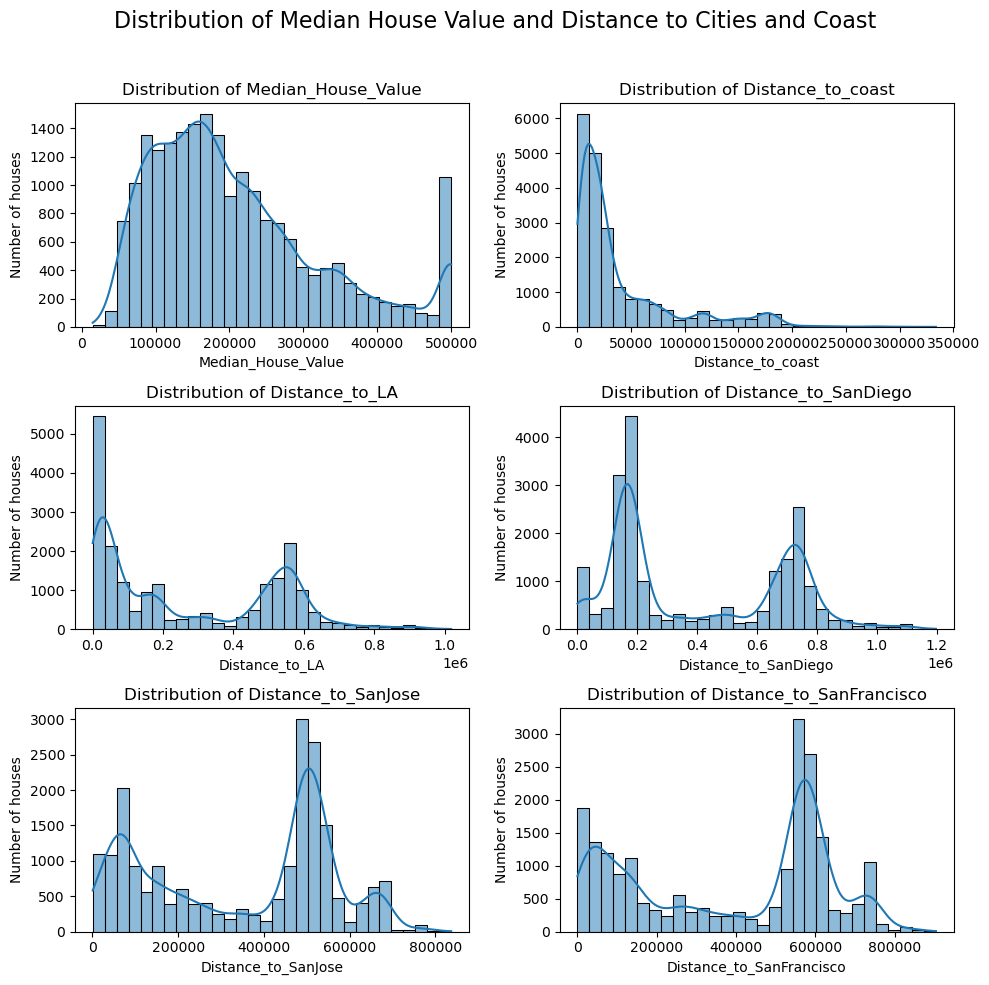

In [32]:
# Plot histograms for all distance columns in a matrix of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Distribution of Median House Value and Distance to Cities and Coast', fontsize=16)

# Plot each column
for ax, column in zip(axes.flatten(), distance_columns):
    sns.histplot(data=distance_columns, x=column, bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_ylabel('Number of houses')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

From the density plot of the Median House Value, there is a skewness to the left. However, there is a noticeable increase on the highest end of Median_House_Value, so that needs to be expected more closely!

In [33]:
# Display the table for the histogram of 'Median_House_Value'
median_house_value_counts = df['Median_House_Value'].value_counts().sort_index()
print(median_house_value_counts)

Median_House_Value
14999.0       4
17500.0       1
22500.0       4
25000.0       1
26600.0       1
           ... 
498800.0      1
499000.0      1
499100.0      1
500000.0     27
500001.0    965
Name: count, Length: 3842, dtype: int64


From the table, it can be seen that there are 965 entries of houses with a median house value of 500001.0. A reason for this could be that this is the limit of median income, and therefore the cut-off value for median_house_value.

## Modelling

### Splitting the data in test and training data

In [34]:
from sklearn.model_selection import train_test_split 


#  Select the variables that we want as outcome (y) amd prediciton (x) variables
X = df[['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco', 'Distance_to_coast']]
y = df[['Median_House_Value']]

# Split the data with 75% train and 25% test.
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=6666)

### Polynomial Linear Regression (Aurel)

In [37]:
from sklearn.linear_model import LinearRegression

mod_poly = LinearRegression()
mod_poly.fit(x_train, y_train)

y_lin_pred = mod_poly.predict(x_test)
y_lin_pred

array([[145463.34204337],
       [249788.2688035 ],
       [180305.09418254],
       ...,
       [192251.96697335],
       [256907.51539726],
       [173048.53912126]])

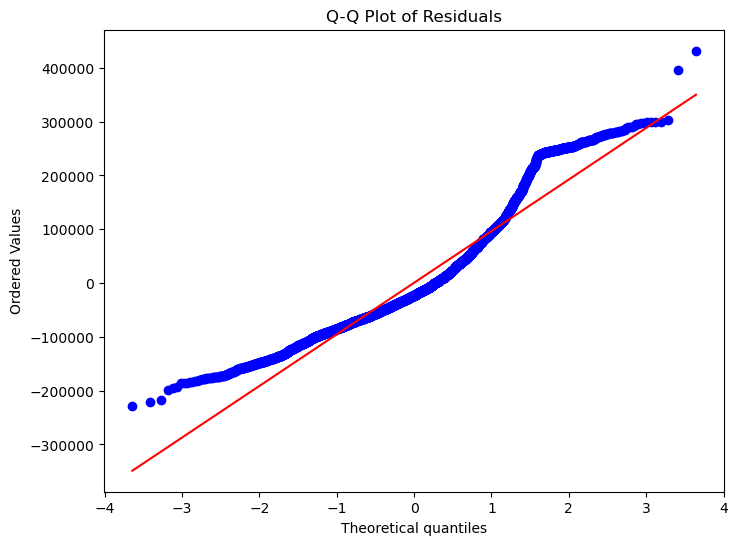

In [57]:
import scipy.stats as stats

# Calculate the residuals
residuals = y_test.values.flatten() - y_lin_pred.flatten()

# Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


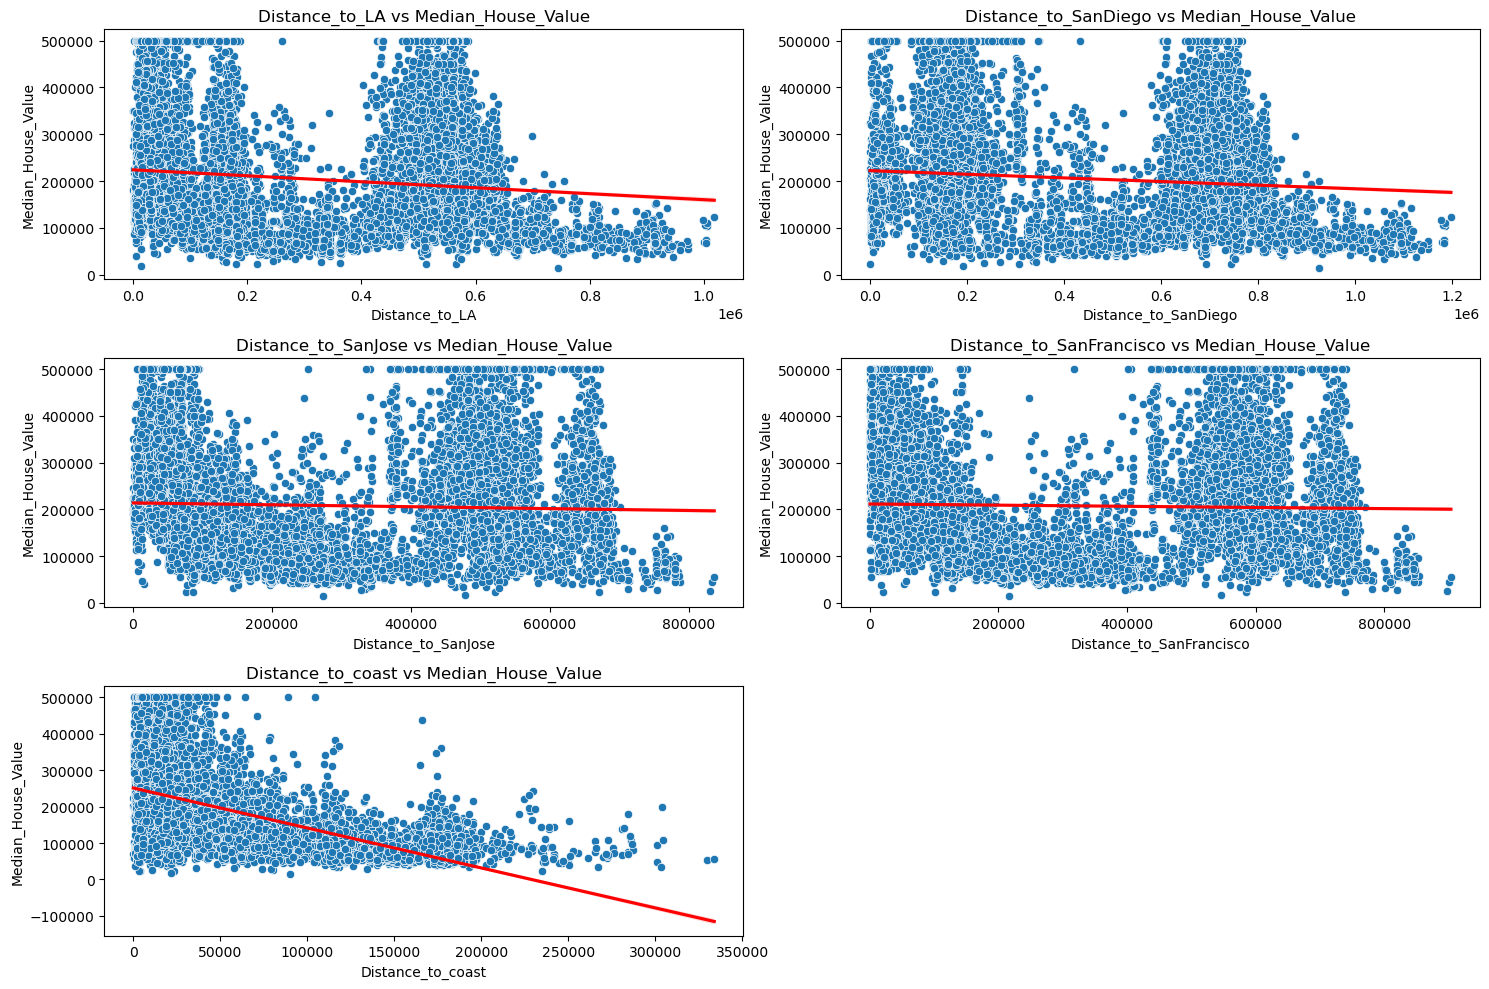

In [58]:
# Define the predictor columns
predictors = ['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco', 'Distance_to_coast']

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create a scatter plot for each predictor
for i, predictor in enumerate(predictors, 1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid of plots
    sns.scatterplot(x=x_train[predictor], y=y_train['Median_House_Value'])
    plt.title(f'{predictor} vs Median_House_Value')
    plt.xlabel(predictor)
    plt.ylabel('Median House Value')
    
    # Add a trend line using seaborn's regplot (fits a linear model)
    sns.regplot(x=x_train[predictor], y=y_train['Median_House_Value'], scatter=False, color='red')

plt.tight_layout()
plt.show()


In [38]:
import sklearn.metrics as metrics
import math

MSE_lin = metrics.mean_squared_error(y_test, y_lin_pred)
RMSE_lin = math.sqrt(MSE_lin)
MAE_lin = metrics.mean_absolute_error(y_test, y_lin_pred)
R2_lin = metrics.r2_score(y_test, y_lin_pred)
Med_abs_er_lin = metrics.median_absolute_error(y_test, y_lin_pred)

print(MSE_lin, RMSE_lin, MAE_lin, R2_lin, Med_abs_er_lin)

9941713259.725357 99708.14038846255 76666.1412418658 0.2533580823954088 61928.71522598798


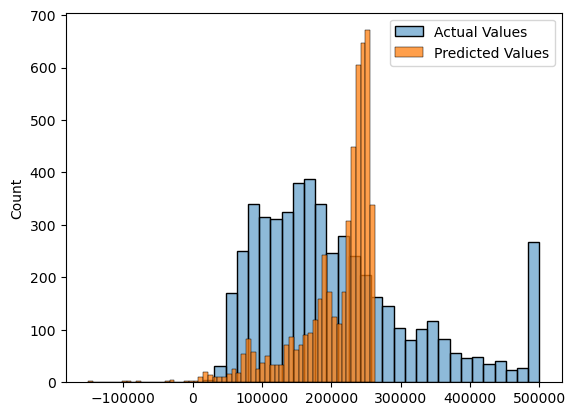

In [39]:
sns.histplot(y_test, label='Actual Values')
sns.histplot(y_lin_pred.flatten(), label='Predicted Values')
plt.legend()

In [40]:
# Calculate the intercept, coefficients and the R-squared
print(mod_poly.intercept_, mod_poly.coef_, mod_poly.score(X, y))


[352073.75491879] [[-0.17618147  0.01080359  0.02651779 -0.18474195 -0.98798091]] 0.2556000762063182


In [41]:
# Calculate the bias
bias_lin = np.mean((y_test - y_lin_pred) ** 2)
bias_lin

9941713259.725357

In [42]:
# Calculate the variance
variance_lin = np.var(y_lin_pred)
variance_lin

3261502273.7827344

In [43]:
# Calculate the total variance of the target variable
total_variance = np.var(y_test)

In [44]:
# Calculate the variance explained by the linear regression model
explained_variance_lin = R2_lin * total_variance

# Calculate the irreducible error for the linear regression model
irreducible_error_lin = total_variance - explained_variance_lin
irreducible_error_lin

Median_House_Value    9.941713e+09
dtype: float64

### Decision Tree Regression (Iris)

In [45]:
from sklearn.tree import DecisionTreeRegressor

# Create the decision tree regressor
decision_tree_model = DecisionTreeRegressor(random_state=6666)

# Train the model
decision_tree_model.fit(x_train, y_train)

# Make predictions
y_dec_pred = decision_tree_model.predict(x_test)

In [46]:
MSE_dec = metrics.mean_squared_error(y_test, y_dec_pred)
RMSE_dec = math.sqrt(MSE_dec)
MAE_dec = metrics.mean_absolute_error(y_test, y_dec_pred)
R2_dec = metrics.r2_score(y_test, y_dec_pred)
Med_abs_er_dec = metrics.median_absolute_error(y_test, y_dec_pred)

print(MSE_dec, RMSE_dec, MAE_dec, R2_dec, Med_abs_er_dec)

4456259893.707648 66755.22371850497 40611.262679109765 0.6653262525825225 21400.0


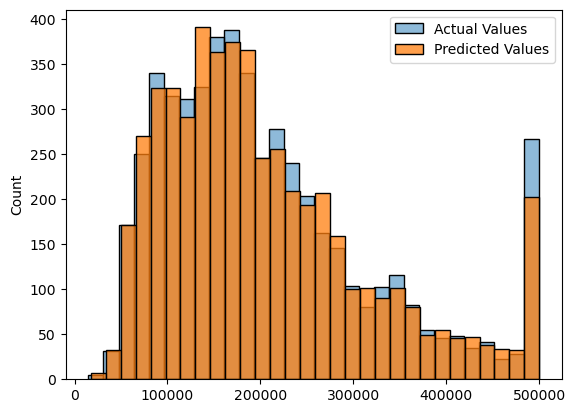

In [47]:
sns.histplot(y_test, label='Actual Values')
sns.histplot(y_dec_pred, label='Predicted Values')
plt.legend()

In [48]:
print(decision_tree_model.score(X, y))

0.8822108763269831


In [49]:
bias_dec = np.mean((y_test.values.flatten() - y_dec_pred) ** 2)
bias_dec

4456259893.707648

In [50]:
variance_dec = np.var(y_dec_pred)
variance_dec

12428932878.786058

In [51]:
# Calculate the variance explained by the decision tree model
explained_variance_dec = R2_dec * total_variance

# Calculate the irreducible error for the decision tree model
irreducible_error_dec = total_variance - explained_variance_dec
irreducible_error_dec

Median_House_Value    4.456260e+09
dtype: float64

## Evaluation

In [52]:
# Create a dictionary with the results
results = {
    'Model': ['Linear Regression', 'Decision Tree'],
    'MSE': [MSE_lin, MSE_dec],
    'RMSE': [RMSE_lin, RMSE_dec],
    'MAE': [MAE_lin, MAE_dec],
    'R2': [R2_lin, R2_dec],
    'Med_abs_er': [Med_abs_er_lin, Med_abs_er_dec],
    'Model Score': [mod_poly.score(X, y), decision_tree_model.score(X, y)],
    'Bias2': [bias_lin, bias_dec],
    'Variance': [variance_lin, variance_dec],
    'Irreducible Error': [irreducible_error_lin.values[0], irreducible_error_dec.values[0]]
}

In [53]:
# Create the dataframe
results_df = pd.DataFrame(results)

# Display the dataframe
results_df.set_index('Model').T

Model,Linear Regression,Decision Tree
MSE,9.941713e+09,4.456260e+09
RMSE,9.970814e+04,6.675522e+04
MAE,7.666614e+04,4.061126e+04
R2,2.533581e-01,6.653263e-01
Med_abs_er,6.192872e+04,2.140000e+04
Model Score,2.556001e-01,8.822109e-01
Bias2,9.941713e+09,4.456260e+09
Variance,3.261502e+09,1.242893e+10
Irreducible Error,9.941713e+09,4.456260e+09


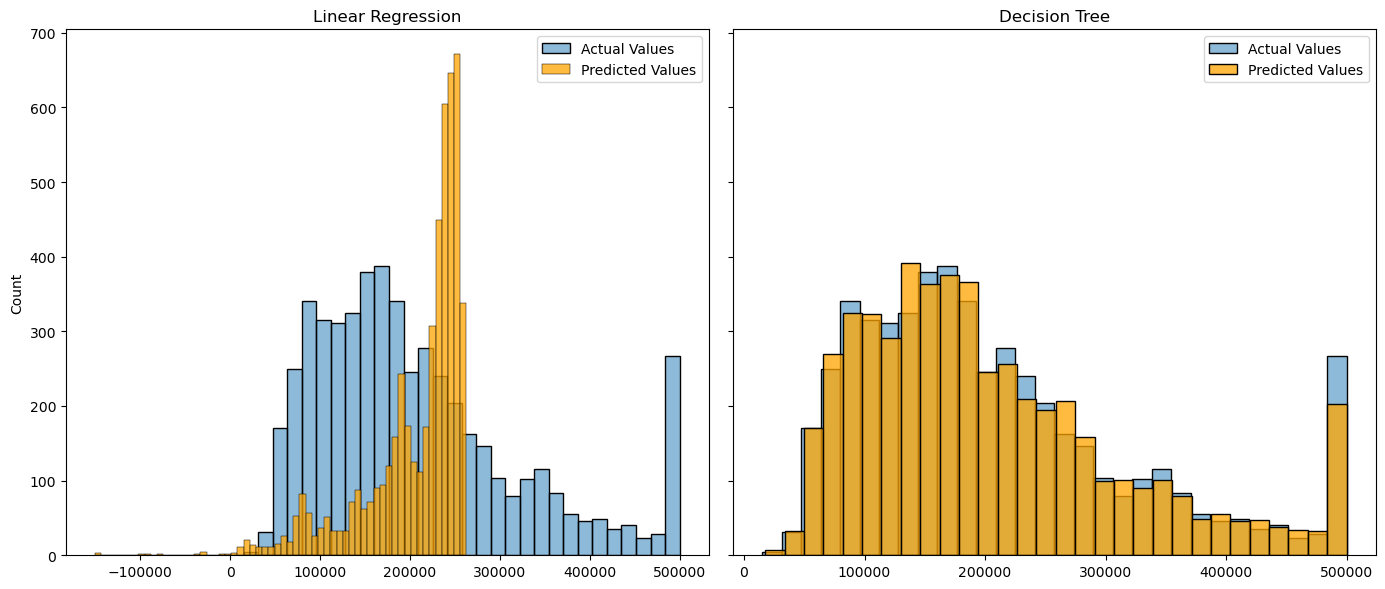

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Linear Regression
sns.histplot(y_test, label='Actual Values', ax=axes[0], color='blue')
sns.histplot(y_lin_pred.flatten(), label='Predicted Values', ax=axes[0], color='orange')
axes[0].set_title('Linear Regression')
axes[0].legend()

# Plot for Decision Tree
sns.histplot(y_test, label='Actual Values', ax=axes[1], color='blue')
sns.histplot(y_dec_pred, label='Predicted Values', ax=axes[1], color='orange')
axes[1].set_title('Decision Tree')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
width=0.45

ax.barh()